In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

# 1. Data Preparation. Check data quality and clean up.

In [2]:
df = pd.read_csv("inpatientCharges.csv")
df.head(20)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,$16920.79,$6653.80,$5374.14
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,$11977.13,$5834.74,$4761.41
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,$35841.09,$8031.12,$5858.50
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,$28523.39,$6113.38,$5228.40
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,$75233.38,$5541.05,$4386.94


In [3]:
len(df['Provider City'].unique())

1977

In [4]:
df.shape

(163065, 12)

In [5]:
df.isna().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [7]:
df.columns = ['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges',
       'Average Total Payments', 'Average Medicare Payments']
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

# 2. EDA. In your EDA you need to show:

## The distribution of single variable

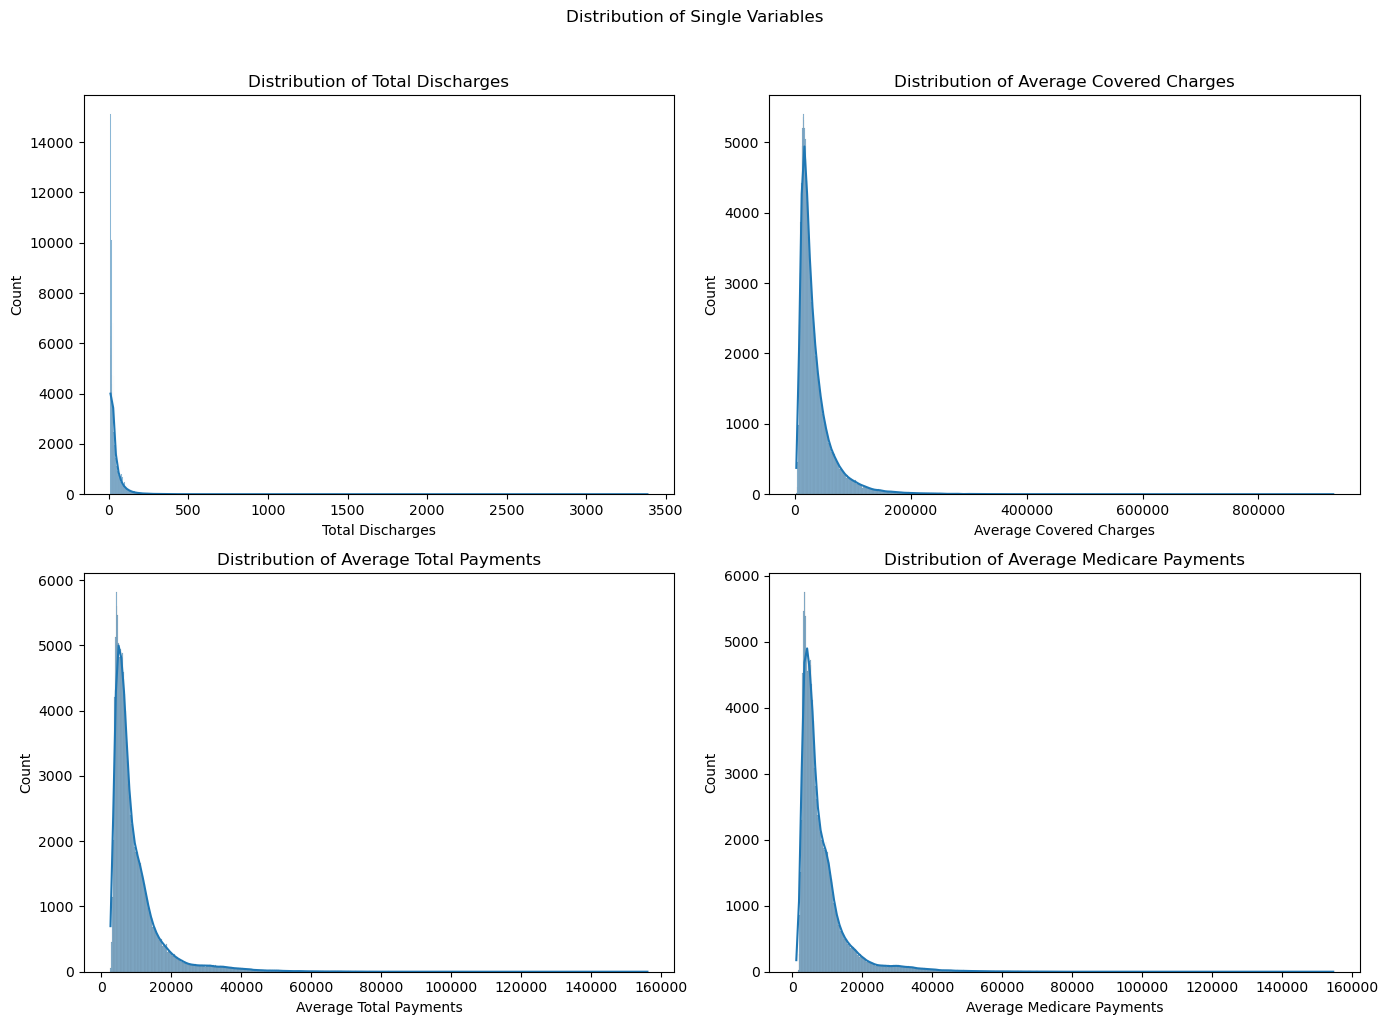

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'df'
# Convert monetary columns to numeric
monetary_columns = ['Average Covered Charges','Average Total Payments', 'Average Medicare Payments']
df[monetary_columns] = df[monetary_columns].replace('[\$,]', '', regex=True).astype(float)

df[monetary_columns] = df[monetary_columns].replace('[\$,]', '', regex=True).astype(float)

# Distribution of Single Variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Distribution of Single Variables', y=1.02)

# 1. Total Discharges
sns.histplot(df['Total Discharges'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Discharges')

# 2. Average Covered Charges
sns.histplot(df['Average Covered Charges'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Average Covered Charges')

# 3. Average Total Payments
sns.histplot(df['Average Total Payments'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Average Total Payments')

# 4. Average Medicare Payments
sns.histplot(df['Average Medicare Payments'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Average Medicare Payments')

plt.tight_layout()
plt.show()


# The distribution of one variable by another categorical variable

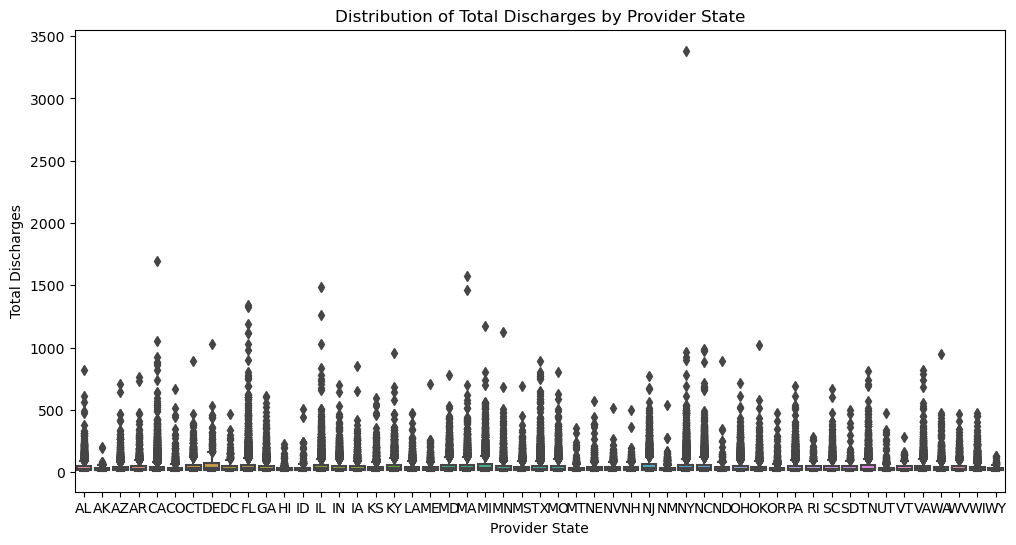

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'df'
# Remove leading and trailing spaces in column names
# Convert monetary columns to numeric
monetary_columns = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Distribution of Total Discharges by Provider State using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Provider State', y='Total Discharges', data=df)
plt.title('Distribution of Total Discharges by Provider State')
plt.xlabel('Provider State')
plt.ylabel('Total Discharges')
plt.show()


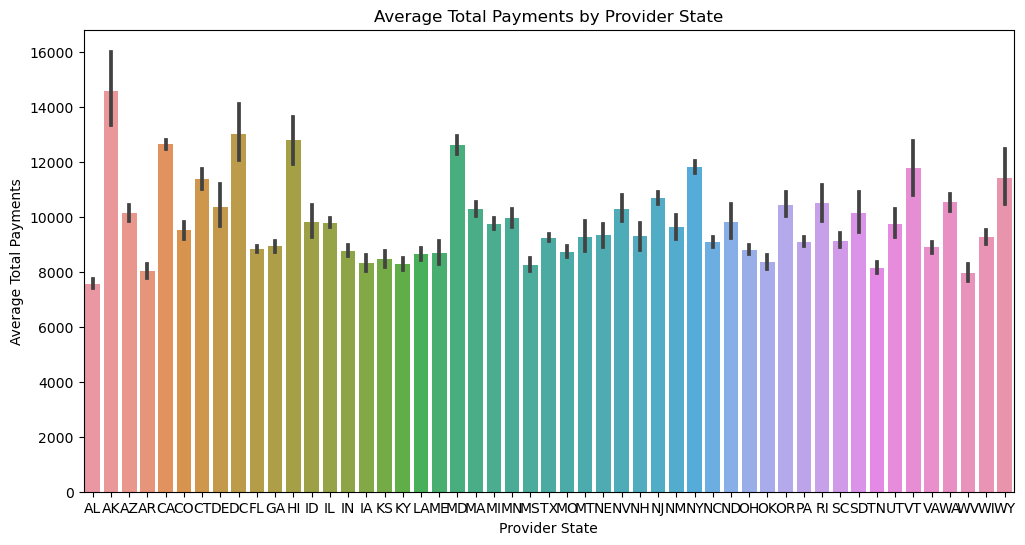

In [10]:
# Average Total Payments by Provider State using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Provider State', y='Average Total Payments', data=df)
plt.title('Average Total Payments by Provider State')
plt.xlabel('Provider State')
plt.ylabel('Average Total Payments')
plt.show()


# the interactions of two or three variables.

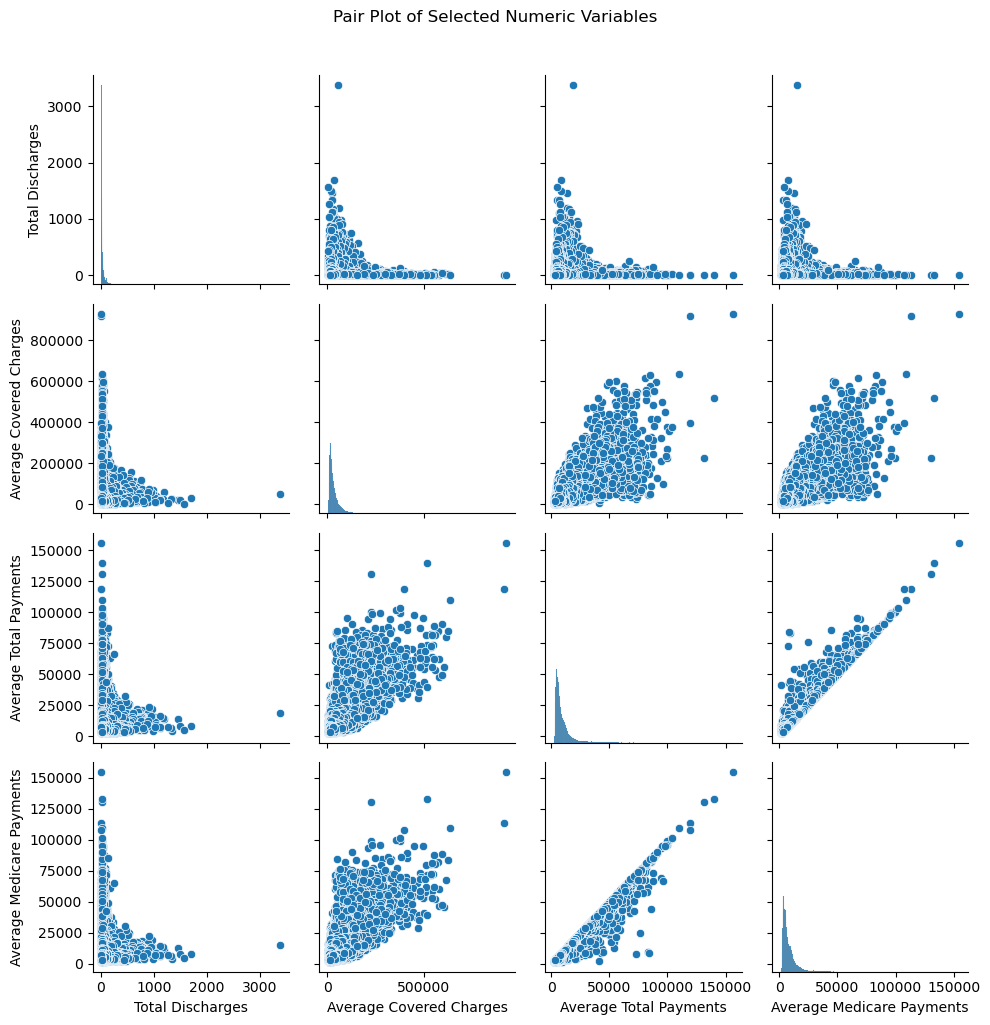

In [11]:

df.columns = df.columns.str.strip()

# Convert monetary columns to numeric
monetary_columns = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
df[monetary_columns] = df[monetary_columns].replace('[\$,]', '', regex=True).astype(float)

# Selecting a subset of columns for pair plot and heatmap
selected_columns = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Pair Plot for selected numeric variables
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()



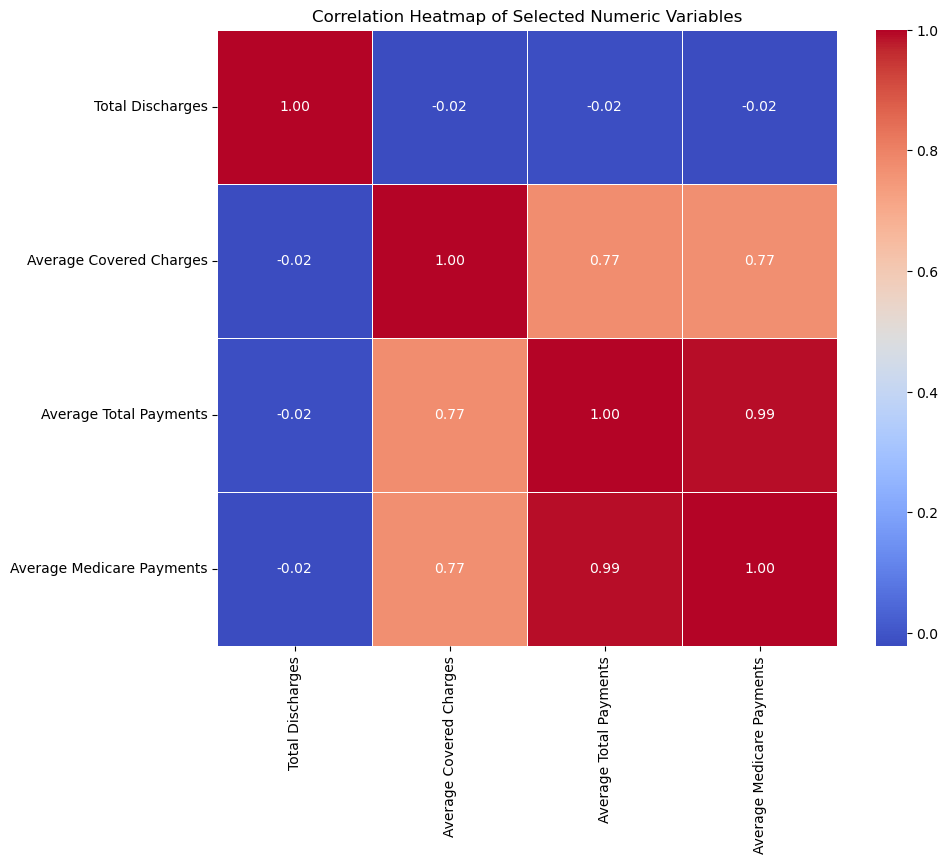

In [12]:
# Heatmap to show correlations between numeric variables
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Numeric Variables')
plt.show()

### 3. Create 20 features

In [13]:
df.shape

(163065, 12)

In [14]:
df['Average Covered Charges'] = df['Average Covered Charges'].replace('[\$,]', '', regex=True).astype(float)
df['Average Total Payments'] = df['Average Total Payments'].replace('[\$,]', '', regex=True).astype(float)
df['Average Medicare Payments'] = df['Average Medicare Payments'].replace('[\$,]', '', regex=True).astype(float)

# Now, perform the binning
charges = df['Average Covered Charges']
total_payments = df['Average Total Payments']
med_payments = df['Average Medicare Payments']

# Define the number of bins
num_bins = 5

# Custom bin edges
bin_edges = [0, 10000, 20000, 30000, 40000, max(charges)]

# Label the bins
label_names = [f'{str(i+1)}' for i in range(num_bins)]

# Create custom bins
custom_bins = pd.cut(charges, bins=bin_edges, labels=label_names)
total_payments_custom_bins = pd.cut(total_payments, bins=bin_edges, labels=label_names)
med_payments_custom_bins = pd.cut(med_payments, bins=bin_edges, labels=label_names)

# Add the new binned column to the DataFrame
df['Charges_Bin'] = custom_bins
df['Total_Payments_Bin'] = total_payments_custom_bins
df['Medicare_Payments_Bin'] = med_payments_custom_bins
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4,1,1


In [15]:
df['Total_Discharge_Cost'] = df['Total Discharges'] * df['Average Covered Charges']
min_value = df['Total_Discharge_Cost'].min()
max_value = df['Total_Discharge_Cost'].max()
df['Total_Discharge_Cost_Normalized'] = (df['Total_Discharge_Cost'] - min_value) / (max_value - min_value)

df['Total_Payment_All_Discharges'] = df['Total Discharges'] * df['Average Total Payments']
min_value = df['Total_Payment_All_Discharges'].min()
max_value = df['Total_Payment_All_Discharges'].max()
df['Total_Payment_Normalized'] = (df['Total_Payment_All_Discharges'] - min_value) / (max_value - min_value)


df['Total_Medicare_Payment_All_Discharges'] = df['Total Discharges'] * df['Average Medicare Payments']
min_value = df['Total_Medicare_Payment_All_Discharges'].min()
max_value = df['Total_Medicare_Payment_All_Discharges'].max()
df['Medicare_Cost_Normalized'] = (df['Total_Medicare_Payment_All_Discharges'] - min_value) / (max_value - min_value)


df['Difference Percentage'] = (((df['Total_Payment_All_Discharges'] + df['Total_Medicare_Payment_All_Discharges'] - df['Total_Discharge_Cost']) / df['Total_Discharge_Cost']) * 100).round(2)

df['Medicare_to_Total_Payment_Ratio'] = (df['Average Medicare Payments'] / df['Average Total Payments'])*100
df['Payment_to_Charge_Ratio'] = (df['Average Total Payments'] / df['Average Covered Charges'])*100

df.head()


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Discharge_Cost_Normalized,Total_Payment_All_Discharges,Total_Payment_Normalized,Total_Medicare_Payment_All_Discharges,Medicare_Cost_Normalized,Difference Percentage,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,0.016531,525728.84,0.007702,433499.43,0.008362,-68.02,82.456848,17.526402
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,0.001014,81025.98,0.000788,69673.94,0.001133,-28.86,85.989629,38.247604
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,0.004852,130438.80,0.001557,106890.96,0.001873,-73.67,81.947212,14.469905
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,0.001783,135439.00,0.001634,103229.00,0.001800,-31.80,76.218076,38.701612
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4,1,1,569398.86,0.003004,101849.94,0.001112,87325.92,0.001484,-66.78,85.739785,17.887275


In [16]:
df['Total_Discharge_Cost'] = df['Total Discharges'] * df['Average Covered Charges']
min_value = df['Total_Discharge_Cost'].min()
max_value = df['Total_Discharge_Cost'].max()
df['Total_Discharge_Cost_Normalized'] = (df['Total_Discharge_Cost'] - min_value) / (max_value - min_value)

df['Total_Payment_All_Discharges'] = df['Total Discharges'] * df['Average Total Payments']
min_value = df['Total_Payment_All_Discharges'].min()
max_value = df['Total_Payment_All_Discharges'].max()
df['Total_Payment_Normalized'] = (df['Total_Payment_All_Discharges'] - min_value) / (max_value - min_value)


df['Total_Medicare_Payment_All_Discharges'] = df['Total Discharges'] * df['Average Medicare Payments']
min_value = df['Total_Medicare_Payment_All_Discharges'].min()
max_value = df['Total_Medicare_Payment_All_Discharges'].max()
df['Medicare_Cost_Normalized'] = (df['Total_Medicare_Payment_All_Discharges'] - min_value) / (max_value - min_value)


df['Difference Percentage'] = (((df['Total_Payment_All_Discharges'] + df['Total_Medicare_Payment_All_Discharges'] - df['Total_Discharge_Cost']) / df['Total_Discharge_Cost']) * 100).round(2)

df['Medicare_to_Total_Payment_Ratio'] = (df['Average Medicare Payments'] / df['Average Total Payments'])*100
df['Payment_to_Charge_Ratio'] = (df['Average Total Payments'] / df['Average Covered Charges'])*100

df.head()


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Discharge_Cost_Normalized,Total_Payment_All_Discharges,Total_Payment_Normalized,Total_Medicare_Payment_All_Discharges,Medicare_Cost_Normalized,Difference Percentage,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,0.016531,525728.84,0.007702,433499.43,0.008362,-68.02,82.456848,17.526402
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,0.001014,81025.98,0.000788,69673.94,0.001133,-28.86,85.989629,38.247604
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,0.004852,130438.80,0.001557,106890.96,0.001873,-73.67,81.947212,14.469905
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,0.001783,135439.00,0.001634,103229.00,0.001800,-31.80,76.218076,38.701612
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4,1,1,569398.86,0.003004,101849.94,0.001112,87325.92,0.001484,-66.78,85.739785,17.887275


In [17]:
df['Total_Discharge_Cost'] = df['Total Discharges'] * df['Average Covered Charges']
min_value = df['Total_Discharge_Cost'].min()
max_value = df['Total_Discharge_Cost'].max()
df['Total_Discharge_Cost_Normalized'] = (df['Total_Discharge_Cost'] - min_value) / (max_value - min_value)

df['Total_Payment_All_Discharges'] = df['Total Discharges'] * df['Average Total Payments']
min_value = df['Total_Payment_All_Discharges'].min()
max_value = df['Total_Payment_All_Discharges'].max()
df['Total_Payment_Normalized'] = (df['Total_Payment_All_Discharges'] - min_value) / (max_value - min_value)


df['Total_Medicare_Payment_All_Discharges'] = df['Total Discharges'] * df['Average Medicare Payments']
min_value = df['Total_Medicare_Payment_All_Discharges'].min()
max_value = df['Total_Medicare_Payment_All_Discharges'].max()
df['Medicare_Cost_Normalized'] = (df['Total_Medicare_Payment_All_Discharges'] - min_value) / (max_value - min_value)


df['Difference Percentage'] = (((df['Total_Payment_All_Discharges'] + df['Total_Medicare_Payment_All_Discharges'] - df['Total_Discharge_Cost']) / df['Total_Discharge_Cost']) * 100).round(2)

df['Medicare_to_Total_Payment_Ratio'] = (df['Average Medicare Payments'] / df['Average Total Payments'])*100
df['Payment_to_Charge_Ratio'] = (df['Average Total Payments'] / df['Average Covered Charges'])*100

df.head()


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Discharge_Cost_Normalized,Total_Payment_All_Discharges,Total_Payment_Normalized,Total_Medicare_Payment_All_Discharges,Medicare_Cost_Normalized,Difference Percentage,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,0.016531,525728.84,0.007702,433499.43,0.008362,-68.02,82.456848,17.526402
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,0.001014,81025.98,0.000788,69673.94,0.001133,-28.86,85.989629,38.247604
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,0.004852,130438.80,0.001557,106890.96,0.001873,-73.67,81.947212,14.469905
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,0.001783,135439.00,0.001634,103229.00,0.001800,-31.80,76.218076,38.701612
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4,1,1,569398.86,0.003004,101849.94,0.001112,87325.92,0.001484,-66.78,85.739785,17.887275


# Groupby Provider City created 5 features 

In [18]:
grp =df
import pandas as pd

# Assuming df is your DataFrame
cols_to_standardize = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments','Total_Medicare_Payment_All_Discharges','Total_Discharge_Cost']

# Define a function to calculate z-scores
z_score = lambda x: (x - x.mean()) / x.std()

# Group by 'Provider City' and calculate z-scores for specified columns
for col in cols_to_standardize:
    z_score_col = f'{col} z-score'
    grp[z_score_col] = df.groupby('Provider City')[col].transform(z_score)
    # Optional: If you want to replace any possible NaN values resulting from division by zero or other issues
    grp[z_score_col] = grp[z_score_col].fillna(0)

# Display the result
# print(grp[['Provider City'] + [f'{col} z-score' for col in cols_to_standardize]])
grp.head(4)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Discharge_Cost_Normalized,Total_Payment_All_Discharges,Total_Payment_Normalized,Total_Medicare_Payment_All_Discharges,Medicare_Cost_Normalized,Difference Percentage,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio,Average Covered Charges z-score,Average Total Payments z-score,Average Medicare Payments z-score,Total_Medicare_Payment_All_Discharges z-score,Total_Discharge_Cost z-score
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,0.016531,525728.84,0.007702,433499.43,0.008362,-68.02,82.456848,17.526402,-0.253140,-0.456736,-0.444381,0.204344,0.547032
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,0.001014,81025.98,0.000788,69673.94,0.001133,-28.86,85.989629,38.247604,-0.147131,-0.376991,-0.293387,-0.729535,-0.674657
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,0.004852,130438.80,0.001557,106890.96,0.001873,-73.67,81.947212,14.469905,-0.141190,-0.534900,-0.524413,-0.578129,-0.462594
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,0.001783,135439.00,0.001634,103229.00,0.001800,-31.80,76.218076,38.701612,-0.749566,-0.537415,-0.540631,-0.510732,-0.674508


In [19]:
grp.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments', 'Charges_Bin', 'Total_Payments_Bin',
       'Medicare_Payments_Bin', 'Total_Discharge_Cost',
       'Total_Discharge_Cost_Normalized', 'Total_Payment_All_Discharges',
       'Total_Payment_Normalized', 'Total_Medicare_Payment_All_Discharges',
       'Medicare_Cost_Normalized', 'Difference Percentage',
       'Medicare_to_Total_Payment_Ratio', 'Payment_to_Charge_Ratio',
       'Average Covered Charges z-score', 'Average Total Payments z-score',
       'Average Medicare Payments z-score',
       'Total_Medicare_Payment_All_Discharges z-score',
       'Total_Discharge_Cost z-score'],
      dtype='object')

In [20]:
from pyod.models.knn import KNN
knn = KNN(contamination=0.05) 

le = LabelEncoder()

# Apply label encoder to each categorical column
grp['Provider State Encoded'] = le.fit_transform(grp['Provider State'])
grp['Provider City Encoded'] = le.fit_transform(grp['Provider City'])
grp['DRG Definition Encoded'] = le.fit_transform(grp['DRG Definition'])

X_train =grp[['Provider State Encoded','Provider City Encoded','DRG Definition Encoded',
              'Average Covered Charges z-score', 'Average Total Payments z-score',
       'Average Medicare Payments z-score',
       'Total_Medicare_Payment_All_Discharges z-score',
       'Total_Discharge_Cost z-score']]
knn.fit(X_train)

knn.fit(X_train)

# Training data
y_train_scores = knn.decision_function(X_train)
y_train_pred = knn.predict(X_train)

# Test data
# y_test_scores = knn.decision_function(X_test)
# y_test_pred = knn.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
# print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)

The training data: {0: 157141, 1: 5924}
The threshold for the defined comtanimation rate: 6.3728924068170745


In [21]:
threshold = knn.threshold_ # Or other value from the above histogram


def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Provider State Encoded,Provider City Encoded,DRG Definition Encoded,Average Covered Charges z-score,Average Total Payments z-score,Average Medicare Payments z-score,Total_Medicare_Payment_All_Discharges z-score,Total_Discharge_Cost z-score,Anomaly_Score
0,Normal,157141,96.367093,24.14,963.14,48.16,-0.06,-0.06,-0.06,-0.08,-0.08,2.58
1,Outlier,5924,3.632907,25.21,997.60,66.03,1.58,1.63,1.60,2.04,2.00,7.64


# Groupby Provider State created 5 features 

In [22]:
# grp = df[['Provider City','Average Covered Charges','Average Total Payments','Average Medicare Payments']].groupby(['Provider City']).std()
# from scipy.stats import zscore
# df[['Provider City','Average Covered Charges','Average Total Payments','Average Medicare Payments']].groupby(['Provider City'])['Average Covered Charges'].transform(lambda x : zscore(x,ddof=1))

grp =df
import pandas as pd

cols_to_standardize = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments','Total_Medicare_Payment_All_Discharges','Total_Discharge_Cost']

# Define a function to calculate z-scores
z_score = lambda x: (x - x.mean()) / x.std()

# Group by 'Provider City' and calculate z-scores for specified columns
for col in cols_to_standardize:
    z_score_col = f'{col} z-score'
    grp[z_score_col] = df.groupby('Provider State')[col].transform(z_score)
    # Optional: If you want to replace any possible NaN values resulting from division by zero or other issues
    grp[z_score_col] = grp[z_score_col].fillna(0)

# print(grp[['Provider City'] + [f'{col} z-score' for col in cols_to_standardize]])
grp.head(4)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Discharge_Cost_Normalized,Total_Payment_All_Discharges,Total_Payment_Normalized,Total_Medicare_Payment_All_Discharges,Medicare_Cost_Normalized,Difference Percentage,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio,Average Covered Charges z-score,Average Total Payments z-score,Average Medicare Payments z-score,Total_Medicare_Payment_All_Discharges z-score,Total_Discharge_Cost z-score,Provider State Encoded,Provider City Encoded,DRG Definition Encoded
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,0.016531,525728.84,0.007702,433499.43,0.008362,-68.02,82.456848,17.526402,0.052023,-0.341775,-0.327975,0.441447,0.830843,1,454,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,0.001014,81025.98,0.000788,69673.94,0.001133,-28.86,85.989629,38.247604,-0.511336,-0.339804,-0.285750,-0.460641,-0.500378,1,177,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,0.004852,130438.80,0.001557,106890.96,0.001873,-73.67,81.947212,14.469905,0.197270,-0.407094,-0.389424,-0.368364,-0.171080,1,582,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,0.001783,135439.00,0.001634,103229.00,0.001800,-31.80,76.218076,38.701612,-0.547150,-0.410412,-0.453785,-0.377443,-0.434428,1,162,0


In [23]:
from pyod.models.knn import KNN
knn = KNN(contamination=0.05) 

le = LabelEncoder()

# Apply label encoder to each categorical column
grp['Provider State Encoded'] = le.fit_transform(grp['Provider State'])
grp['Provider City Encoded'] = le.fit_transform(grp['Provider City'])
grp['DRG Definition Encoded'] = le.fit_transform(grp['DRG Definition'])

X_train =grp[['Provider State Encoded','Provider City Encoded','DRG Definition Encoded',
              'Average Covered Charges z-score', 'Average Total Payments z-score',
       'Average Medicare Payments z-score',
       'Total_Medicare_Payment_All_Discharges z-score',
       'Total_Discharge_Cost z-score']]
knn.fit(X_train)

knn.fit(X_train)

# Training data
y_train_scores = knn.decision_function(X_train)
y_train_pred = knn.predict(X_train)

# Test data
# y_test_scores = knn.decision_function(X_test)
# y_test_pred = knn.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
# print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)

The training data: {0: 157207, 1: 5858}
The threshold for the defined comtanimation rate: 6.071887177223845


In [24]:
threshold = knn.threshold_ # Or other value from the above histogram


def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Provider State Encoded,Provider City Encoded,DRG Definition Encoded,Average Covered Charges z-score,Average Total Payments z-score,Average Medicare Payments z-score,Total_Medicare_Payment_All_Discharges z-score,Total_Discharge_Cost z-score,Anomaly_Score
0,Normal,157207,96.407568,24.15,963.01,48.23,-0.06,-0.06,-0.06,-0.07,-0.07,2.50
1,Outlier,5858,3.592432,25.06,1001.54,64.31,1.48,1.58,1.57,1.79,1.74,7.57


# Groupby Provider Zip Code created 5 features 

In [25]:
grp =df
import pandas as pd

# Assuming df is your DataFrame
cols_to_standardize = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments','Total_Medicare_Payment_All_Discharges','Total_Discharge_Cost']

# Define a function to calculate z-scores
z_score = lambda x: (x - x.mean()) / x.std()

# Group by 'Provider City' and calculate z-scores for specified columns
for col in cols_to_standardize:
    z_score_col = f'{col} z-score'
    grp[z_score_col] = df.groupby('Provider Zip Code')[col].transform(z_score)
    # Optional: If you want to replace any possible NaN values resulting from division by zero or other issues
    grp[z_score_col] = grp[z_score_col].fillna(0)

# print(grp[['Provider City'] + [f'{col} z-score' for col in cols_to_standardize]])
grp.head(4)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Discharge_Cost_Normalized,Total_Payment_All_Discharges,Total_Payment_Normalized,Total_Medicare_Payment_All_Discharges,Medicare_Cost_Normalized,Difference Percentage,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio,Average Covered Charges z-score,Average Total Payments z-score,Average Medicare Payments z-score,Total_Medicare_Payment_All_Discharges z-score,Total_Discharge_Cost z-score,Provider State Encoded,Provider City Encoded,DRG Definition Encoded
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,0.016531,525728.84,0.007702,433499.43,0.008362,-68.02,82.456848,17.526402,-0.102496,-0.492153,-0.486499,0.036539,0.575158,1,454,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,0.001014,81025.98,0.000788,69673.94,0.001133,-28.86,85.989629,38.247604,-0.147131,-0.376991,-0.293387,-0.729535,-0.674657,1,177,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,0.004852,130438.80,0.001557,106890.96,0.001873,-73.67,81.947212,14.469905,0.023227,-0.490562,-0.477653,-0.578813,-0.377567,1,582,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,0.001783,135439.00,0.001634,103229.00,0.001800,-31.80,76.218076,38.701612,-0.736364,-0.498389,-0.532817,-0.411281,-0.562338,1,162,0


In [26]:
from pyod.models.knn import KNN
knn = KNN(contamination=0.05) 

le = LabelEncoder()

# Apply label encoder to each categorical column
grp['Provider State Encoded'] = le.fit_transform(grp['Provider State'])
grp['Provider City Encoded'] = le.fit_transform(grp['Provider City'])
grp['DRG Definition Encoded'] = le.fit_transform(grp['DRG Definition'])

X_train =grp[['Provider State Encoded','Provider City Encoded','DRG Definition Encoded',
              'Average Covered Charges z-score', 'Average Total Payments z-score',
       'Average Medicare Payments z-score',
       'Total_Medicare_Payment_All_Discharges z-score',
       'Total_Discharge_Cost z-score']]
knn.fit(X_train)

knn.fit(X_train)

# Training data
y_train_scores = knn.decision_function(X_train)
y_train_pred = knn.predict(X_train)

# Test data
# y_test_scores = knn.decision_function(X_test)
# y_test_pred = knn.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
# print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)

The training data: {0: 157215, 1: 5850}
The threshold for the defined comtanimation rate: 6.349715168815637


In [27]:
threshold = knn.threshold_ # Or other value from the above histogram


def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Provider State Encoded,Provider City Encoded,DRG Definition Encoded,Average Covered Charges z-score,Average Total Payments z-score,Average Medicare Payments z-score,Total_Medicare_Payment_All_Discharges z-score,Total_Discharge_Cost z-score,Anomaly_Score
0,Normal,157215,96.412474,24.14,962.96,48.17,-0.06,-0.06,-0.06,-0.07,-0.07,2.58
1,Outlier,5850,3.587526,25.19,1002.86,66.00,1.50,1.54,1.52,1.84,1.79,7.50


# Groupby DRG Definition created 5 features 

In [28]:
grp =df
import pandas as pd

# Assuming df is your DataFrame
cols_to_standardize = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments','Total_Medicare_Payment_All_Discharges','Total_Discharge_Cost']

# Define a function to calculate z-scores
z_score = lambda x: (x - x.mean()) / x.std()

# Group by 'Provider City' and calculate z-scores for specified columns
for col in cols_to_standardize:
    z_score_col = f'{col} z-score'
    grp[z_score_col] = df.groupby('DRG Definition')[col].transform(z_score)
    # Optional: If you want to replace any possible NaN values resulting from division by zero or other issues
    grp[z_score_col] = grp[z_score_col].fillna(0)

# print(grp[['Provider City'] + [f'{col} z-score' for col in cols_to_standardize]])
grp.head(4)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Discharge_Cost_Normalized,Total_Payment_All_Discharges,Total_Payment_Normalized,Total_Medicare_Payment_All_Discharges,Medicare_Cost_Normalized,Difference Percentage,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio,Average Covered Charges z-score,Average Total Payments z-score,Average Medicare Payments z-score,Total_Medicare_Payment_All_Discharges z-score,Total_Discharge_Cost z-score,Provider State Encoded,Provider City Encoded,DRG Definition Encoded
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,0.016531,525728.84,0.007702,433499.43,0.008362,-68.02,82.456848,17.526402,0.155639,-0.800673,-0.640831,2.244193,3.155512,1,454,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,0.001014,81025.98,0.000788,69673.94,0.001133,-28.86,85.989629,38.247604,-0.962919,-0.793683,-0.468526,-0.855056,-1.011085,1,177,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,0.004852,130438.80,0.001557,106890.96,0.001873,-73.67,81.947212,14.469905,0.444029,-1.032283,-0.891578,-0.538022,0.019586,1,582,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,0.001783,135439.00,0.001634,103229.00,0.001800,-31.80,76.218076,38.701612,-1.034028,-1.044050,-1.154211,-0.569217,-0.804666,1,162,0


In [29]:
# Create a label encoder object
le = LabelEncoder()

# Apply label encoder to each categorical column
df['Provider State Encoded'] = le.fit_transform(df['Provider State'])
df['Provider City Encoded'] = le.fit_transform(df['Provider City'])
df['DRG Definition Encoded'] = le.fit_transform(df['DRG Definition'])

In [30]:
# Frequency encoding for 'Provider State', 'DRG Definition', 'Provider City'
state_freq = ((df['Provider State'].value_counts() / len(df)) * 100).round(2) 
df['Provider State Freq'] = df['Provider State'].map(state_freq)

city_freq = ((df['Provider City'].value_counts() / len(df)) *100).round(2)
df['Provider City Freq'] = df['Provider City'].map(city_freq)

drg_freq = ((df['DRG Definition'].value_counts() / len(df)) * 100).round(2)
df['DRG Definition Freq'] = df['DRG Definition'].map(drg_freq)

In [31]:
drg_discharges = df.groupby('DRG Definition')['Total Discharges'].sum()
drg_discharges_df = drg_discharges.reset_index()

# Rename the columns for clarity
drg_discharges_df.columns = ['DRG Definition', 'Total Discharges']
sorted_drg_discharges = drg_discharges.sort_values(ascending=True)

# Find the indices to split the sorted series into three parts
split_indices = [int(1/3 * len(sorted_drg_discharges)), int(2/3 * len(sorted_drg_discharges))]

# Split the sorted series into three parts and assign reverse categories
high_discharge_drg = sorted_drg_discharges[:split_indices[0]].to_frame(name='Total Discharges')
high_discharge_drg['Category'] = 'High'

medium_discharge_drg = sorted_drg_discharges[split_indices[0]:split_indices[1]].to_frame(name='Total Discharges')
medium_discharge_drg['Category'] = 'Medium'

low_discharge_drg = sorted_drg_discharges[split_indices[1]:].to_frame(name='Total Discharges')
low_discharge_drg['Category'] = 'Low'

# Combine them back into a single DataFrame
categorized_drg_discharges = pd.concat([high_discharge_drg, medium_discharge_drg, low_discharge_drg]).reset_index()

# Create a dictionary for mapping DRG Definition to Category
drg_category_map = dict(zip(categorized_drg_discharges['DRG Definition'], categorized_drg_discharges['Category']))

# Map the Category to the original df
df['Procedure Complexity'] = df['DRG Definition'].map(drg_category_map)

numerical_encoding = {'Low': 0, 'Medium': 1, 'High':2}
df['Procedure Complexity Number'] = df['Procedure Complexity'].map(numerical_encoding).astype(int)

In [32]:
feature_columns = ['Average Covered Charges','Average Total Payments','Average Medicare Payments'] 
X = df[feature_columns]
Y = df['Procedure Complexity Number']
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Discharge_Cost_Normalized,Total_Payment_All_Discharges,Total_Payment_Normalized,Total_Medicare_Payment_All_Discharges,Medicare_Cost_Normalized,Difference Percentage,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio,Average Covered Charges z-score,Average Total Payments z-score,Average Medicare Payments z-score,Total_Medicare_Payment_All_Discharges z-score,Total_Discharge_Cost z-score,Provider State Encoded,Provider City Encoded,DRG Definition Encoded,Provider State Freq,Provider City Freq,DRG Definition Freq,Procedure Complexity,Procedure Complexity Number
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,0.016531,525728.84,0.007702,433499.43,0.008362,-68.02,82.456848,17.526402,0.155639,-0.800673,-0.640831,2.244193,3.155512,1,454,0,2.23,0.10,0.66,Medium,1
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,0.001014,81025.98,0.000788,69673.94,0.001133,-28.86,85.989629,38.247604,-0.962919,-0.793683,-0.468526,-0.855056,-1.011085,1,177,0,2.23,0.03,0.66,Medium,1
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,0.004852,130438.80,0.001557,106890.96,0.001873,-73.67,81.947212,14.469905,0.444029,-1.032283,-0.891578,-0.538022,0.019586,1,582,0,2.23,0.21,0.66,Medium,1
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,0.001783,135439.00,0.001634,103229.00,0.001800,-31.80,76.218076,38.701612,-1.034028,-1.044050,-1.154211,-0.569217,-0.804666,1,162,0,2.23,0.33,0.66,Medium,1
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4,1,1,569398.86,0.003004,101849.94,0.001112,87325.92,0.001484,-66.78,85.739785,17.887275,0.072220,-0.881133,-0.569872,-0.704687,-0.476692,1,13,0,2.23,0.05,0.66,Medium,1


# Definition of 20 features of the dataset

- We have created 20 features by doing a groupby on <b>Provider city, state, drg definition, zip code</b> listed below. 

#### By "Provider City"
1. Average Covered Charges z-score  
2. Average Total Payments z-score	 
3. Average Medicare Payments z-score	 
4. Total_Medicare_Payment_All_Discharges z-score 	
5. Total_Discharge_Cost z-score 

#### By "Provider State"
6. Average Covered Charges z-score  
7. Average Total Payments z-score	 
8. Average Medicare Payments z-score	 
9. Total_Medicare_Payment_All_Discharges z-score 	
10. Total_Discharge_Cost z-score 

#### By "Provider Zip Code"
11. Average Covered Charges z-score  
12. Average Total Payments z-score	 
13. Average Medicare Payments z-score	 
14. Total_Medicare_Payment_All_Discharges z-score 	
15. Total_Discharge_Cost z-score 

#### By "DRG Definition"
16. Average Covered Charges z-score  
17. Average Total Payments z-score	 
18. Average Medicare Payments z-score	 
19. Total_Medicare_Payment_All_Discharges z-score 	
20. Total_Discharge_Cost z-score 

#### Definition of above features
 
 - Out of that we created a z score column for <b>'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments','Total_Medicare_Payment_All_Discharges','Total_Discharge_Cost'</b>.

 - We have 5 columns and we did 4 groupby in total 5x4 = 20 features created. 

 - On every Iteration of groupby there were some certians amounts of outiers being detected out of which the Provider city, state gave us the proper segregation of data by anomaly score.

 - Anomaly Score:
    - The "Anomaly_Score" column provides the mean anomaly score for both normal and outlier instances.
    In this case, the mean anomaly score for normal instances is 2.58, while for outlier instances, it's 7.64. This indicates that outlier instances have higher anomaly scores, as expected.

 - In the function descriptive_stat_threshold, you are using these anomaly scores along with a threshold to classify data points as "Normal" or "Outlier". 

 - So, in summary, the anomaly_score represents the degree to which a data point is considered abnormal or deviates from the majority of the data, and the threshold is used to classify data points as normal or outliers based on these scores.
 
 - Statistics provide a comparison between normal and outlier instances in terms of encoded categorical features, z-scored numerical features, and the anomaly score. The higher mean anomaly score for outlier instances suggests that the model is effectively identifying and assigning higher scores to instances that deviate significantly from the norm.

## Additional 10 Features

#### 'Total_Discharge_Cost': 

- This feature is calculated by multiplying two existing columns in the DataFrame, namely 'Total Discharges' and 'Average Covered Charges'.
- The result represents the total cost associated with discharges for each corresponding row in the DataFrame

#### 'Total_Payment_All_Discharges': 

- This feature is calculated by multiplying two existing columns in the DataFrame, specifically 'Total Discharges' and 'Average Total Payments'.
- The result represents the total payment associated with all discharges for each corresponding row in the DataFrame.


#### 'Total_Medicare_Payment_All_Discharges':

- This feature is calculated by multiplying two existing columns in the DataFrame, namely 'Total Discharges' and 'Average Medicare Payments'.
- The result represents the total Medicare payment associated with all discharges for each corresponding row in the DataFrame

#### 'Difference Percentage':

- This feature calculates the percentage difference between the sum of 'Total_Payment_All_Discharges' and 'Total_Medicare_Payment_All_Discharges' and the 'Total_Discharge_Cost', relative to 'Total_Discharge_Cost'. 
- The result represents the percentage difference between the total payments and Medicare payments for all discharges compared to the total discharge cost, rounded to two decimal places

#### 'Medicare_to_Total_Payment_Ratio':

- This feature calculates the ratio of 'Average Medicare Payments' to 'Average Total Payments' and expresses it as a percentage.
- The result represents the percentage of the total payment covered by Medicare on average.

#### 'Payment_to_Charge_Ratio':

- This feature calculates the ratio of 'Average Total Payments' to 'Average Covered Charges' and expresses it as a percentage.
- The result represents the percentage of the covered charges that are paid on average.

#### Charges_Bin

- 'Charges_Bin' represents the binned or discretized version of the 'Average Covered Charges' column. The bins are defined based on custom bin edges, and each value in the 'Average Covered Charges' column is assigned to a specific bin, creating a categorical feature that can be used for analysis, visualization, or modeling purposes

#### Procedure_Complexity

- 'Procedure Complexity' represents the complexity level of medical procedures based on the total discharges for each DRG Definition. The complexity levels are categorized into 'Low,' 'Medium,' and 'High.'
- The 'Procedure Complexity Number' provides a numerical encoding for these complexity levels, facilitating numerical analysis or machine learning applications
- A new DataFrame, 'categorized_drg_discharges,' is created with columns 'DRG Definition,' 'Total Discharges,' and 'Category,' indicating the complexity level of each procedure
- A numerical encoding of complexity levels is created in the 'Procedure Complexity Number' column, where 'Low' is encoded as 0, 'Medium' as 1, and 'High' as 2

#### Provider State Freq

- This feature represents the frequency of each unique state in the 'Provider State' column as a percentage of the total number of entries in the DataFrame.
- The value_counts() function is used to count the occurrences of each unique state, and the result is divided by the total number of entries in the DataFrame.
- The calculated frequencies are then rounded to two decimal places using the round(2) method.
- The 'Provider State Freq' column is created by mapping each 'Provider State' value to its corresponding frequency.

#### Provider City Freq:

- This feature represents the frequency of each unique city in the 'Provider City' column as a percentage of the total number of entries in the DataFrame.
- Similarly, the value_counts() function is used to count the occurrences of each unique city, and the result is divided by the total number of entries in the DataFrame.
- The calculated frequencies are rounded to two decimal places using the round(2) method.
- The 'Provider City Freq' column is created by mapping each 'Provider City' value to its corresponding frequency.




# KNN

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from pyod.models.knn import KNN

In [34]:
knn = KNN(contamination=0.05) 

le = LabelEncoder()

# Apply label encoder to each categorical column
grp['Provider State Encoded'] = le.fit_transform(grp['Provider State'])
grp['Provider City Encoded'] = le.fit_transform(grp['Provider City'])
grp['DRG Definition Encoded'] = le.fit_transform(grp['DRG Definition'])

X_train =grp[['Provider State Encoded','Provider City Encoded','DRG Definition Encoded',
              'Average Covered Charges z-score', 'Average Total Payments z-score',
       'Average Medicare Payments z-score',
       'Total_Medicare_Payment_All_Discharges z-score',
       'Total_Discharge_Cost z-score']]
knn.fit(X_train)

knn.fit(X_train)

# Training data
y_train_scores = knn.decision_function(X_train)
y_train_pred = knn.predict(X_train)

# Test data
# y_test_scores = knn.decision_function(X_test)
# y_test_pred = knn.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
# print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)



The training data: {0: 157752, 1: 5313}
The threshold for the defined comtanimation rate: 5.499369362620285


In [35]:
threshold = knn.threshold_ # Or other value from the above histogram


def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Provider State Encoded,Provider City Encoded,DRG Definition Encoded,Average Covered Charges z-score,Average Total Payments z-score,Average Medicare Payments z-score,Total_Medicare_Payment_All_Discharges z-score,Total_Discharge_Cost z-score,Anomaly_Score
0,Normal,157752,96.74179,24.18,962.90,48.56,0.00,-0.01,-0.01,0.01,0.00,2.57
1,Outlier,5313,3.25821,24.30,1008.71,56.11,-0.03,0.27,0.24,-0.16,-0.09,6.64


In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=42)

In [38]:
knn = KNeighborsClassifier(n_neighbors=20) 
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

In [39]:
Y_pred = knn.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(f"Accuracy: {(accuracy_score(Y_test, Y_pred)*100).round(2)}%")


[[6960  858  281]
 [3460 1176  322]
 [2224  690  336]]
              precision    recall  f1-score   support

           0       0.55      0.86      0.67      8099
           1       0.43      0.24      0.31      4958
           2       0.36      0.10      0.16      3250

    accuracy                           0.52     16307
   macro avg       0.45      0.40      0.38     16307
weighted avg       0.48      0.52      0.46     16307

Accuracy: 51.95%


In [40]:
neighbors = range(1, 26)  # Considering 1 to 25 neighbors
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(Y_test, Y_pred))

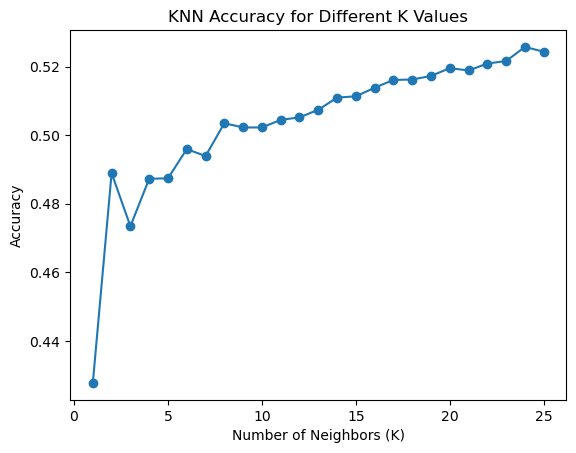

In [41]:
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()

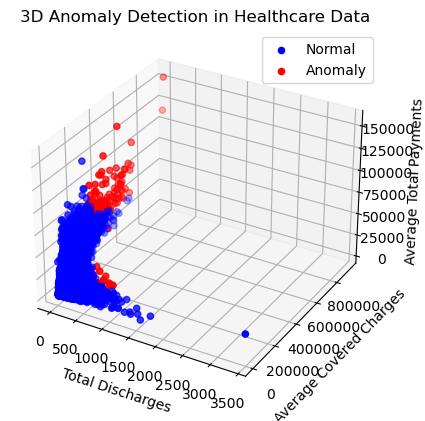

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load data
data = df.copy()

# Select and scale features
features = data[['Total Discharges', 'Average Covered Charges', 'Average Total Payments']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
model.fit(scaled_features)

# Predictions
data['outlier'] = model.predict(scaled_features)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Normal data points
ax.scatter(data[data['outlier'] == 1]['Total Discharges'], 
           data[data['outlier'] == 1]['Average Covered Charges'], 
           data[data['outlier'] == 1]['Average Total Payments'], 
           c='blue', label='Normal')

# Anomalies
ax.scatter(data[data['outlier'] == -1]['Total Discharges'], 
           data[data['outlier'] == -1]['Average Covered Charges'], 
           data[data['outlier'] == -1]['Average Total Payments'], 
           c='red', label='Anomaly')

ax.set_xlabel('Total Discharges')
ax.set_ylabel('Average Covered Charges')
ax.set_zlabel('Average Total Payments')
ax.set_title('3D Anomaly Detection in Healthcare Data')
ax.legend()

plt.show()


In [43]:
outliers = data.groupby('Provider Name')['outlier'].count().sort_values(ascending=False)
outliers_df = outliers.reset_index()
outliers_df.head(10)

,Provider Name,outlier
0,GOOD SAMARITAN HOSPITAL,633
1,ST JOSEPH MEDICAL CENTER,427
2,MERCY MEDICAL CENTER,357
3,MERCY HOSPITAL,347
4,ST JOSEPH HOSPITAL,343
5,ST FRANCIS MEDICAL CENTER,277
6,ST MARY MEDICAL CENTER,264
7,ST LUKES HOSPITAL,259
8,ST FRANCIS HOSPITAL,253
9,JEFFERSON REGIONAL MEDICAL CENTER,232


- Variation in Outlier Counts: There is a significant variation in the number of outliers across different providers. Good Samaritan Hospital, leading the list, has a notably higher count (633 outliers) compared to others.

- Potential Areas of Concern or Investigation: High numbers of outliers at specific hospitals, like Good Samaritan Hospital and St Joseph Medical Center, might indicate areas requiring further investigation. Outliers could be due to various factors like unusual billing practices, unique patient demographics, specialized treatments or procedures that they offer, or data entry errors.

In [44]:
kmean= KMeans(16)
kmean.fit(df[['Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments']])
labels=kmean.labels_

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Charges_Bin,Total_Payments_Bin,Medicare_Payments_Bin,Total_Discharge_Cost,Total_Discharge_Cost_Normalized,Total_Payment_All_Discharges,Total_Payment_Normalized,Total_Medicare_Payment_All_Discharges,Medicare_Cost_Normalized,Difference Percentage,Medicare_to_Total_Payment_Ratio,Payment_to_Charge_Ratio,Average Covered Charges z-score,Average Total Payments z-score,Average Medicare Payments z-score,Total_Medicare_Payment_All_Discharges z-score,Total_Discharge_Cost z-score,Provider State Encoded,Provider City Encoded,DRG Definition Encoded,Provider State Freq,Provider City Freq,DRG Definition Freq,Procedure Complexity,Procedure Complexity Number,cluster
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4,1,1,2999639.37,0.016531,525728.84,0.007702,433499.43,0.008362,-68.02,82.456848,17.526402,0.155639,-0.800673,-0.640831,2.244193,3.155512,1,454,0,2.23,0.10,0.66,Medium,1,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,2,1,1,211845.90,0.001014,81025.98,0.000788,69673.94,0.001133,-28.86,85.989629,38.247604,-0.962919,-0.793683,-0.468526,-0.855056,-1.011085,1,177,0,2.23,0.03,0.66,Medium,1,7
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4,1,1,901448.88,0.004852,130438.80,0.001557,106890.96,0.001873,-73.67,81.947212,14.469905,0.444029,-1.032283,-0.891578,-0.538022,0.019586,1,582,0,2.23,0.21,0.66,Medium,1,5
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2,1,1,349957.00,0.001783,135439.00,0.001634,103229.00,0.001800,-31.80,76.218076,38.701612,-1.034028,-1.044050,-1.154211,-0.569217,-0.804666,1,162,0,2.23,0.33,0.66,Medium,1,7
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4,1,1,569398.86,0.003004,101849.94,0.001112,87325.92,0.001484,-66.78,85.739785,17.887275,0.072220,-0.881133,-0.569872,-0.704687,-0.476692,1,13,0,2.23,0.05,0.66,Medium,1,0


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


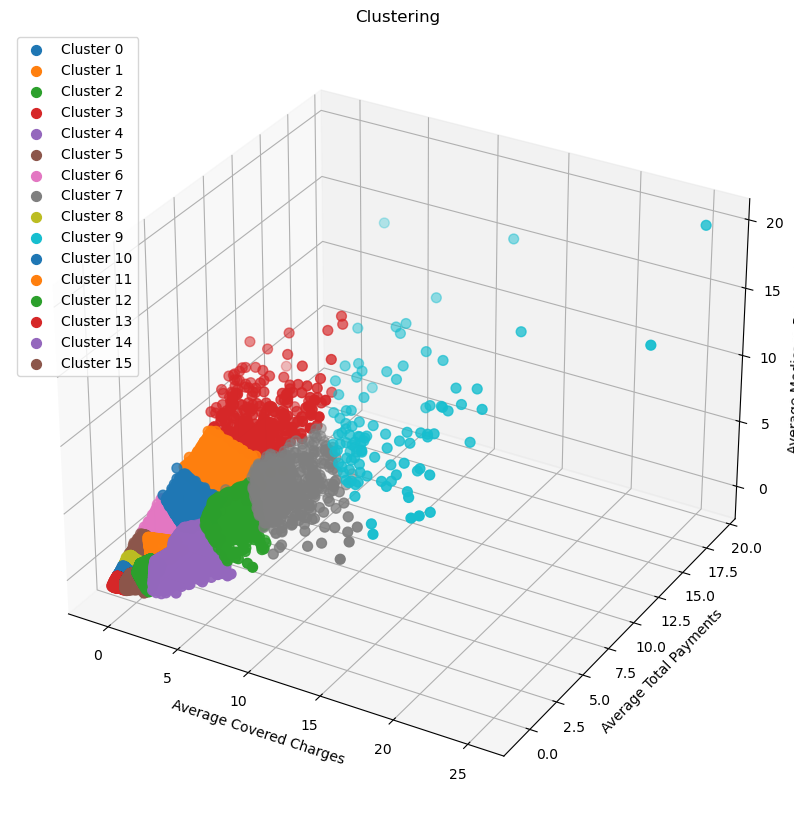

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
columns_to_standardize = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments', 'Total_Payment_All_Discharges']

# Extract the columns you want to standardize
data_to_standardize = df[columns_to_standardize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data_to_standardize)

# Create a new DataFrame with the standardized values
df_standardized = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized DataFrame with the original DataFrame, excluding the columns to be standardized
df_result = pd.concat([df.drop(columns=columns_to_standardize), df_standardized], axis=1)

# Assuming 'Average Covered Charges', 'Average Total Payments', and 'Average Medicare Payments' are the features
features = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Fit KMeans model
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(df_result[features])

# Get cluster labels
labels = kmeans.labels_

# Plot 3D scatter plot with legend
fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111, projection='3d')

# Loop through each cluster label and plot a scatter plot for that cluster
for cluster_label in range(16):
    cluster_indices = labels == cluster_label
    ax.scatter(df_result.loc[cluster_indices, features[0]],
               df_result.loc[cluster_indices, features[1]],
               df_result.loc[cluster_indices, features[2]],
               label=f'Cluster {cluster_label}',
               s=50)

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('Clustering')

# Add legend
ax.legend()

plt.show()


Cluster 9 is characterized by high sparsity, meaning the data points within this cluster are more dispersed compared to other clusters. This could indicate a larger variance in the attributes or behaviors of the elements grouped in this cluster.

In [47]:
clusters_state = clusters[clusters['cluster']==9]['Provider State'].value_counts()
clusters_state.head()

CA    2021
FL    1267
TX    1216
NJ     850
IL     700
Name: Provider State, dtype: int64

In [48]:

city_counts = clusters[(clusters['cluster'] == 9) & (clusters['Provider State'] == 'CA')].groupby(['Provider State', 'Provider City']).size()

# Sort the results by Provider City in descending order
sorted_city_counts = city_counts.sort_values(ascending=False)
sorted_city_counts.head()

Provider State  Provider City
CA              LOS ANGELES      132
                SAN FRANCISCO     76
                SACRAMENTO        57
                SAN JOSE          48
                SAN DIEGO         43
dtype: int64

# PCA

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


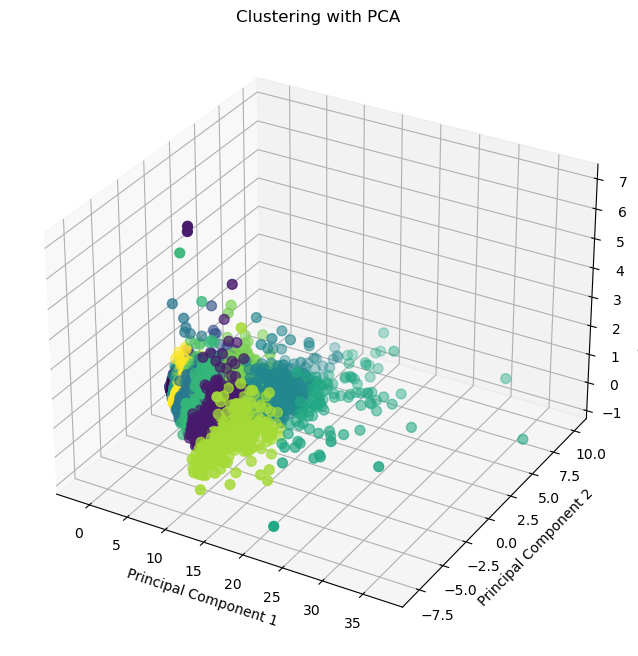

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
columns_to_standardize = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments',
                          'Total_Payment_All_Discharges',]

# Extract the columns you want to standardize
data_to_standardize = df[columns_to_standardize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data_to_standardize)

# Create a new DataFrame with the standardized values
df_standardized = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized DataFrame with the original DataFrame, excluding the columns to be standardized
df_result = pd.concat([df.drop(columns=columns_to_standardize), df_standardized], axis=1)

features = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_result[features])

# Fit KMeans model on PCA-transformed data
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(X_pca)

# Get cluster labels
labels = kmeans.labels_

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Clustering with PCA')

plt.show()


# Explain what PCA and KNNs are

Principal Component Analysis (PCA) and k-Nearest Neighbors (KNN) are both machine learning techniques used for different purposes.

1. **Principal Component Analysis (PCA):**
   - **Objective:** PCA is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining as much of the original variability as possible.
   - **How it works:** PCA identifies the principal components, which are the directions in the data that capture the most variance. These components are linear combinations of the original features. The first principal component explains the most variance, the second principal component explains the second most, and so on.
   - **Use cases:**
     - Dimensionality reduction: Reducing the number of features while preserving most of the information.
     - Data visualization: Projecting high-dimensional data into a lower-dimensional space for visualization purposes.
     - Noise reduction: Focusing on the most important features and ignoring less relevant ones.

2. **k-Nearest Neighbors (KNN):**
   - **Objective:** KNN is a supervised machine learning algorithm used for classification and regression tasks. It makes predictions based on the majority class (for classification) or the average of nearest neighbors' values (for regression).
   - **How it works:** Given a new data point, KNN identifies the k nearest data points in the training set based on a chosen distance metric (commonly Euclidean distance). For classification, the class label of the majority of these neighbors is assigned to the new point. For regression, the average of the target values of these neighbors is assigned.
   - **Use cases:**
     - Classification: Assigning a class label to a new data point based on the majority class of its k-nearest neighbors.
     - Regression: Predicting a continuous target variable based on the average of the target values of its k-nearest neighbors.
     - Anomaly detection: Identifying outliers in the data based on the distance to their k-nearest neighbors.

In summary, PCA is a technique for reducing the dimensionality of data, while KNN is a supervised learning algorithm used for classification and regression tasks based on the similarity of data points in a high-dimensional space.


# Conclusion

- We used KNN and combination of PCA and KNN which gives the clusters 

- The "Anomaly_Score" column provides the mean anomaly score for both normal and outlier instances. In this case, the mean anomaly score for normal instances is 2.58, while for outlier instances, it's 7.64. This indicates that outlier instances have higher anomaly scores, as expected.

- The anomaly_score quantifies how much a particular data point diverges from the general pattern or norm observed in the dataset. A threshold is then applied to categorize these data points into either normal or outlier categories, based on their level of deviation as indicated by the anomaly score.

- California has highest number of anomaly and sparsity in data points which concludes that there are anomalies in california state hospitals. Los Angeles has highest number of anomaly present according to the data analysis.

- KMeans clustering is also used to identify natural groupings in the data based on similarities across the various features. Each cluster represents a different pattern or group of similar data points in the dataset. The clusters may reveal different subgroups within the data, each characterized by unique combinations of features. For example, certain clusters might represent different types of healthcare providers or different billing practices.

## KNN

- Predominance of Normal Data Points: 96.74% of the data points are classified as normal. This suggests that the majority of the data conforms to the common patterns identified by the KNN model.

- Identification of Outliers: 3.26% of the data points are identified as outliers. These points deviate significantly from the typical patterns in the dataset, which could be due to unusual billing practices, atypical patient cases, or data entry errors.

- Comparative Analysis: The average values for each feature within the normal and outlier groups provide interesting insights. For instance, the slight differences in 'Provider State Encoded', 'Provider City Encoded', and 'DRG Definition Encoded' between normal and outlier groups may indicate geographical or procedural influences on what is considered an outlier.

- Anomaly Scores: The average anomaly scores for normal and outlier groups (2.57 and 6.64, respectively) demonstrate the model's ability to distinguish between typical and atypical patterns. Higher scores in the outlier group confirm the model's effectiveness in identifying deviations.

## PCA

- The 3D scatter plot provides a visual representation of how the data points are grouped across the three principal components, offering an intuitive understanding of the clusters' distribution and separation. The use of 16 clusters suggests a fine-grained approach to understanding the data's structure, which could be useful for identifying specific patterns or anomalies in healthcare charges and payments

- The standardization process ensures that each feature contributes equally to the analysis, addressing the issue of varying scales. PCA effectively reduces the dataset's complexity, making it more manageable and revealing the underlying structure of the data. 

## BUSINESS INSIGHTS

Identifying Inefficiencies and Cost Drivers:

1. Anomalies as Cost Indicators: Outliers identified in the billing or treatment cost data may indicate inefficiencies or areas where costs are significantly higher than average. These insights can guide cost optimization strategies.

2. Cluster-Specific Analysis: By examining the characteristics of clusters with a high concentration of anomalies, healthcare providers can identify specific areas (e.g., certain procedures or treatments) where costs are unexpectedly high.

3. Treatment Variability: Anomalies in treatment patterns could reveal significant variability in care provision. Understanding these variations can help standardize care delivery and improve patient outcomes.

4. Resource Allocation: Clusters with high anomalies in service utilization might indicate either overutilization or underutilization of resources, guiding better allocation and management.